In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Signal parameters

amp = 0.1 # V

freq = 8 # Hz  


In [3]:
# Sampling parameters

srate = 1000 # Hz

time  = np.arange(0, 1, 1/srate)

In [4]:
# Create the signal

signal = amp * np.sin( 2 * np.pi * freq * time)

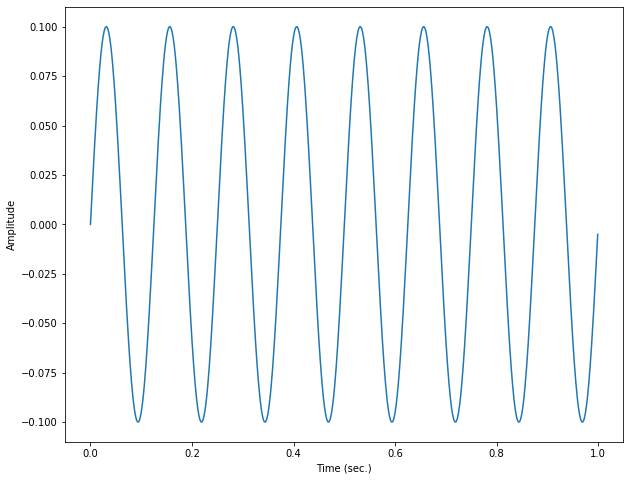

In [7]:
plt.figure(figsize=(10,8))
plt.plot(time,signal)

plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()

In [8]:
# Add noise

noise_amp = 0.1

noise  = noise_amp * np.random.randn(len(time))

dirty = signal + noise

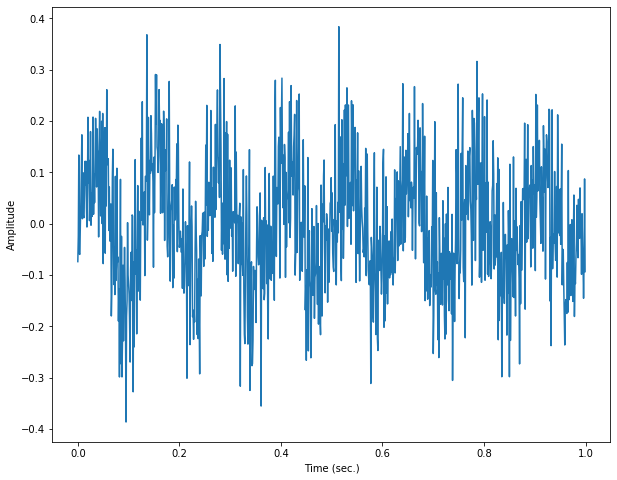

In [9]:
plt.figure(figsize=(10,8))
plt.plot(time,dirty)

plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()

In [10]:
# Initialize filtered signal vector

filtered = np.zeros(len(time))

In [11]:
# Implement the running mean filter

k = 26 # filter window is actually k*2+1

for i in range(k,len(time)-k-1):
    # each point is the average of k surrounding points
    filtered[i] = np.mean(dirty[i-k:i+k])

In [12]:
# Compute window size in ms

windowsize = 1000*(k*2+1) / srate

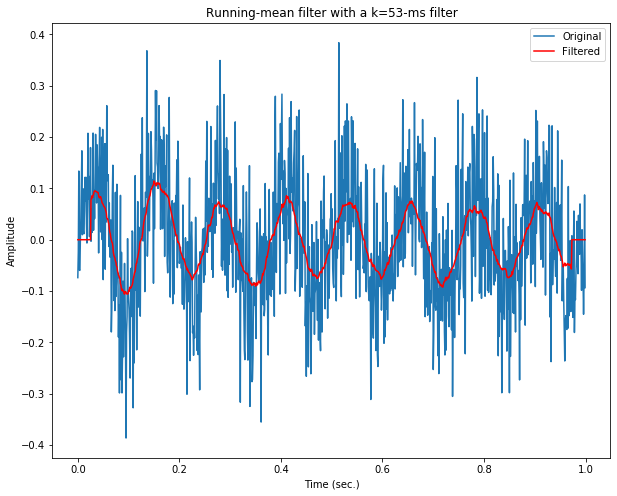

In [16]:
# Plot the noisy and filtered signals

plt.figure(figsize=(10,8))
plt.plot(time,dirty,label='Original')
plt.plot(time,filtered,'r',label='Filtered')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Running-mean filter with a k=%d-ms filter' %windowsize)

plt.show()

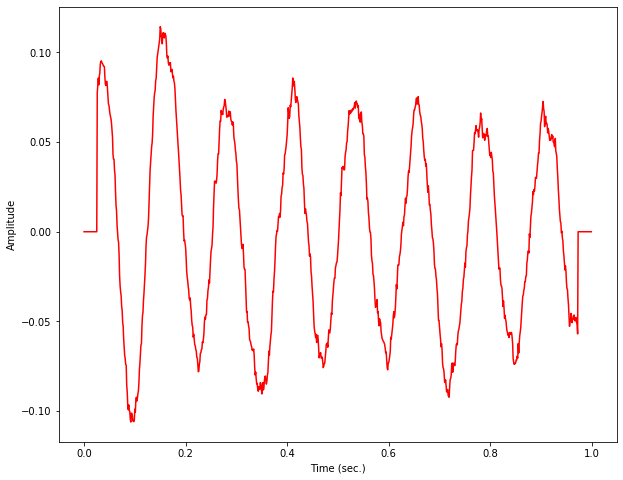

In [15]:
plt.figure(figsize=(10,8))
plt.plot(time,filtered,'r')

plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()